In [1]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import os

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
# 读入数据
df = pd.read_csv('../my_data.csv')
df=df.drop('Formula', axis=1)
df_columns = df.columns
# 标准化
scaler = StandardScaler()
df = scaler.fit_transform(df)

df = pd.DataFrame(df)
df.columns = df_columns

X = df.iloc[:, 0:57]
Y = df.iloc[:, 57:]
Y = Y['SLME @ 5um']

In [3]:
# 划分训练集和验证集
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)


In [4]:
rf = RandomForestRegressor(n_estimators=20,
                                      max_features='log2',
                                      max_depth=448,
                                      min_samples_split=2,
                                      min_samples_leaf=1,
                                      bootstrap=False,
                                      random_state=1)

rf.fit(X_train, y_train)
rfe = RFE(rf)             
rfe = rfe.fit(X_train, y_train)

In [5]:
# predict prices of X_test
y_pred = rfe.predict(X_test)
# evaluate the model on test set
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.9188233701173522


In [6]:
# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(rf, X_train, y_train, scoring='r2', cv=folds)
scores  

array([0.89952244, 0.95306181, 0.91572434, 0.8636731 , 0.96880966])

In [7]:
scores = cross_val_score(rf, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores

array([-0.09366658, -0.14191481, -0.05508972, -0.15314593, -0.04755604])

In [8]:
#Grid Search CV
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

hyper_params = [{'n_features_to_select': np.arange(1,58)}]

rfe = RFE(rf)

In [9]:
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

model_cv.fit(X_train, y_train)  
print(model_cv.best_score_)
print(model_cv.best_estimator_)
print(model_cv.best_params_)
cv_results = pd.DataFrame(model_cv.cv_results_)
# 将 cv_results 数据帧保存为 CSV 文件
cv_results.to_csv('cv_results.csv', index=False)
cv_results

Fitting 5 folds for each of 57 candidates, totalling 285 fits
0.9329110586864557
RFE(estimator=RandomForestRegressor(bootstrap=False, max_depth=448,
                                    max_features='log2', n_estimators=20,
                                    random_state=1),
    n_features_to_select=37)
{'n_features_to_select': 37}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.779472,0.011450,0.001476,0.000599,1,{'n_features_to_select': 1},0.619605,0.719171,0.740520,0.765022,...,0.724443,0.056180,55,0.788907,0.836161,0.770147,0.765365,0.762319,0.784580,0.027395
1,0.772589,0.015235,0.001804,0.000397,2,{'n_features_to_select': 2},0.591907,0.759647,0.666133,0.726851,...,0.710709,0.075390,57,0.825090,0.836896,0.830697,0.821510,0.808036,0.824446,0.009720
2,0.780508,0.012771,0.001810,0.000400,3,{'n_features_to_select': 3},0.609779,0.769627,0.632733,0.732280,...,0.713250,0.080648,56,0.833356,0.836896,0.843259,0.840784,0.826822,0.836223,0.005786
3,0.799873,0.044647,0.002025,0.000564,4,{'n_features_to_select': 4},0.807097,0.893117,0.873614,0.786103,...,0.854629,0.049455,54,0.992246,0.994490,0.994919,0.990080,0.991741,0.992695,0.001795
4,0.787547,0.044531,0.002025,0.000552,5,{'n_features_to_select': 5},0.912725,0.948282,0.937159,0.902404,...,0.931747,0.021088,3,0.999565,0.998801,0.998773,0.998671,0.998992,0.998960,0.000320
5,0.856734,0.020217,0.002204,0.000511,6,{'n_features_to_select': 6},0.906635,0.942163,0.939387,0.884730,...,0.926943,0.027554,20,0.999801,0.998801,0.999711,0.998671,0.999020,0.999201,0.000468
6,0.909206,0.115719,0.002002,0.000631,7,{'n_features_to_select': 7},0.886046,0.936216,0.930771,0.901895,...,0.922021,0.024806,40,0.999801,0.999013,0.999711,0.998671,0.999020,0.999243,0.000438
7,0.837540,0.024603,0.002203,0.000400,8,{'n_features_to_select': 8},0.882076,0.952525,0.931604,0.897766,...,0.924670,0.030222,29,0.999801,0.999896,0.999740,0.999781,0.999020,0.999648,0.000318
8,0.768840,0.020517,0.002099,0.000199,9,{'n_features_to_select': 9},0.887787,0.951905,0.926439,0.902076,...,0.926472,0.028839,22,0.999806,0.999901,0.999740,0.999814,0.999929,0.999838,0.000068
9,0.747174,0.030770,0.002002,0.000316,10,{'n_features_to_select': 10},0.899623,0.946444,0.933781,0.899376,...,0.928809,0.025887,9,0.999806,0.999901,0.999748,0.999814,0.999969,0.999848,0.000078


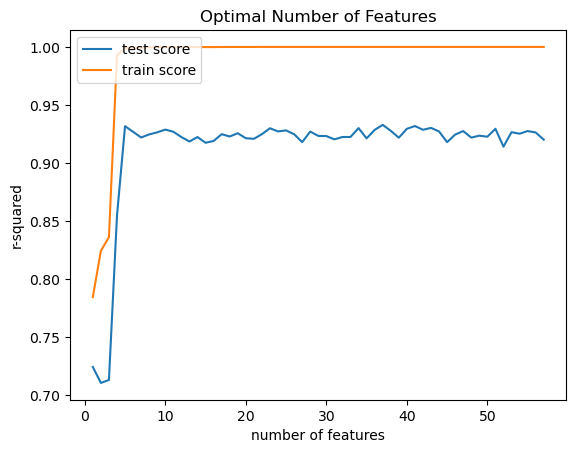

In [10]:
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [11]:
rfe = RFE(rf, n_features_to_select=10)             
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('K_frac', False, 41),
 ('Rb_frac', False, 44),
 ('Cs_frac', False, 40),
 ('MA_frac', False, 38),
 ('FA_frac', False, 42),
 ('Li_frac', False, 48),
 ('Ca_frac', False, 34),
 ('Sr_frac', False, 36),
 ('Ba_frac', False, 25),
 ('Ge_frac', False, 37),
 ('Sn_frac', False, 17),
 ('Pb_frac', False, 23),
 ('Be_frac', False, 46),
 ('Ni_frac', False, 45),
 ('Cl_frac', False, 43),
 ('Br_frac', False, 39),
 ('I_frac', False, 16),
 ('F_frac', False, 47),
 ('A_Ionic_radius', False, 13),
 ('B_Ionic_radius', False, 20),
 ('X_Ionic_radius', False, 32),
 ('A+B_Ionic_radius', True, 1),
 ('A+X_Ionic_radius', False, 5),
 ('B+X_Ionic_radius', True, 1),
 ('A/B_Ionic_radius', False, 6),
 ('A/X_Ionic_radius', True, 1),
 ('B/X_Ionic_radius', True, 1),
 ('Tolerance factor', True, 1),
 ('Octahedral factor', True, 1),
 ('A_Ionization energy(kJ/mol)', False, 18),
 ('B_Ionization energy(kJ/mol)', False, 3),
 ('X_Ionization energy(kJ/mol)', False, 4),
 ('A_Electron_affinity(kJ/mol)', False, 29),
 ('B_Electron_affini